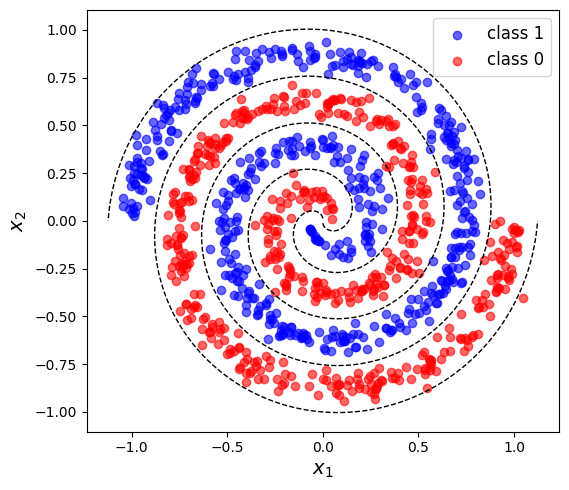

In [6]:
# basic_datasets.py
# Gerry Angelatos

# Below we define functions to generate data for a pair of basic classification tasks:
# n-dimensional radius (n-spheres) and 2-d spirals

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import sklearn


# spirals dataset

def Spiral_sample2(dW, Ns, ts = 0, Nturns = 3, Sep = 0.05, seed=100):
    """
    Generates sample of a 2d spiral with N turns and standard deviation dw
    This version '2' adds noise normal to the spiral line (ie radial white noise)
    and normalizes the dataset relative so the noise free set is in [-1, 1]x2
    Parameters
    -----------
    dW
        width of spiral arms (noise strength),
        scales with the number of turns, so strength of 1
        gives about ~90% probability of falling in the correct arm
    Ns
        number of uniformly distributed points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    seed
        random seed so dataset is repeateable
    Returns
    ----------
    np.array
       (2 x Ns) array of uniform samples over spiral length,
       normally distributed at specific angle
    """
    rs = np.random.RandomState(seed = seed + int(ts*100) )
    theta = np.sqrt(rs.rand(Ns)) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    Norm =  np.array([spiral[0]-spiral[1]/r, spiral[1]-spiral[0]/r]) # normal vector to each point
    return (spiral + (dW * Norm / np.sqrt(Norm[0]**2 + Norm[1]**2))* rs.randn(1, Ns) )/np.max(np.abs(spiral)) # add noise, normalize


def Spiral_line(Ns, ts = 0, Nturns = 3, Sep = 0.05):
    """
    Generates a 2d spiral with N turns
    Parameters
    -----------
    dW
        width of spiral arms (noise strength)
    Ns
        number of equally spaced points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    Returns
    ----------
    np.array
       (2 x Ns) array tracing out a spiral in the x-y plane from the origin

    """
    theta = np.linspace(0, 1, Ns) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    return spiral



def Spiral_sample(dW, Ns, ts = 0, Nturns = 3, Sep = 0.05, seed=100):
    """
    Generates sample of a 2d spiral with N turns and standard deviation dw
    Parameters
    -----------
    dW
        width of spiral arms (noise strength)
    Ns
        number of uniformly distributed points in spiral
    ts
        starting point (radians) relative to y-axis
    Nturns
        number of turns (radians/pi)
    Sep
        starting displacement from origin
    seed
        random seed so dataset is repeateable
    Returns
    ----------
    np.array
       (2 x Ns) array of uniform samples over spiral length,
       normally distributed at specific angle


    """
    rs = np.random.RandomState(seed = seed + int(ts*100) )
    theta = np.sqrt(rs.rand(Ns)) * Nturns * np.pi
    r = theta + np.pi*Sep
    spiral = np.array([(np.cos(ts)*np.cos(theta) - np.sin(ts)*np.sin(theta)) *r,
                      (np.sin(ts)*np.cos(theta) + np.cos(ts)*np.sin(theta) ) *r])
    return spiral + rs.randn(2, Ns) * dW

    # Spirals dataset


#parameters of spirals
D_spiral = 2
N_spiral = 1000
cphase = [0, 1] # starting angles, units of pi
Nturns = 4 # number of pi/2 rotations per spiral arm
Sep = 0.05 # separation of arms at origin (small, poistive)
W = 0.5 # relative width of spiral arms due to noise

# generate input set from each class
x_spiral0 = Spiral_sample2(W, int(N_spiral/2), ts = cphase[0]*np.pi, Nturns = Nturns, Sep = Sep).T
x_spiral1 = Spiral_sample2(W, int(N_spiral/2), ts = cphase[1]*np.pi, Nturns = Nturns, Sep = Sep).T
# concatenate to 1 dataset, with alternating labels
x_spiral = np.dstack((x_spiral1.T, x_spiral0.T)).reshape(D_spiral,  N_spiral).T

# class labels, assign to class 1 if in spiral 1, assign to class 0 if in spiral 0
Y_spiral = np.dstack((np.ones(int(N_spiral/2)),np.zeros(int(N_spiral/2)) )).flatten() # class 1 maps to 1, class 0 to 0


# useful functions for visualization
# define center line of each spiral
spiral_center0 = Spiral_line(int(N_spiral/2), ts = cphase[0]*np.pi, Nturns = Nturns, Sep = Sep)
spiral_center1 = Spiral_line(int(N_spiral/2), ts = cphase[1]*np.pi, Nturns = Nturns, Sep = Sep)
# normalise centers
Spiral_length = np.max([np.max(np.abs(spiral_center0)), np.max(np.abs(spiral_center0))])
spiral_center0, spiral_center1 = spiral_center0/Spiral_length, spiral_center1/ Spiral_length
# separating lines
spiral_mid1 = Spiral_line(int(N_spiral/2), ts = np.mean(cphase)*np.pi, Nturns = Nturns+.5, Sep = Sep)/ Spiral_length
spiral_mid2 = Spiral_line(int(N_spiral/2), ts = (np.mean(cphase)-1)*np.pi, Nturns = Nturns+.5, Sep = Sep)/ Spiral_length

def plot_spirals(x_spiral, Y_spiral):
    fig_spiral, ax_spiral =  plt.subplots(1, 1, figsize=(6,5))

    ax_spiral.scatter(x_spiral[np.argwhere(Y_spiral), 0], x_spiral[np.argwhere(Y_spiral), 1],
                      color = f'b',marker = 'o', alpha = .6, label = 'class 1')
    ax_spiral.scatter(x_spiral[np.argwhere(Y_spiral<0.5), 0], x_spiral[np.argwhere(Y_spiral<0.5), 1],
                      color = f'r',marker = 'o', alpha = .6, label = 'class 0')
    ax_spiral.plot(spiral_mid1[0], spiral_mid1[1], '--k', linewidth=1)
    ax_spiral.plot(spiral_mid2[0], spiral_mid2[1], '--k', linewidth=1)
    ax_spiral.set_xlabel('$x_1$', fontsize=14), ax_spiral.set_ylabel('$x_2$', fontsize=14)
    ax_spiral.legend(fontsize=12)
    ax_spiral.set_aspect('equal', 'box')
    fig_spiral.tight_layout()
plot_spirals(x_spiral, Y_spiral)

In [7]:
from sklearn import svm
from time import time
from datetime import timedelta


# is this a good split? should we instead have train data closer to (0, 0) and test farther?
train_idx = np.random.choice(range(len(x_spiral)), size=round(0.7*len(x_spiral)), replace=False)
mask = np.zeros(len(x_spiral), dtype=bool)
mask[train_idx] = True
train_data, test_data = x_spiral[mask], x_spiral[~mask]
train_label, test_label = Y_spiral[mask], Y_spiral[~mask]

In [4]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

dimensions = 2

feature_map = ZZFeatureMap(feature_dimension=dimensions, reps=3, entanglement="linear")
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [8]:
from sklearn.svm import SVC
import time

svc = SVC(kernel=kernel.evaluate)
start = time.time()
svc.fit(train_data, train_label)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

Training time: 2008 seconds


In [9]:
from pathos.multiprocessing import ProcessingPool as Pool

def predict(classifier_data):
    classifier, data, i = classifier_data
    return (classifier.predict(data), i)

with Pool(8) as p:
    test_pred = p.amap(predict, [(svc, test_data[i], i) for i in range(len(test_data))])

while not test_pred.ready():
    time.sleep(5); print(".", end=' ')
test_pred = test_pred.get()
test_pred2 = [None for i in range(len(test_pred))]
for e in test_pred:
    test_pred2[e[1]] = e[0]

print()
print(f"Callable kernel classification test score: {np.mean(1.0 - (abs(test_pred2 - test_label)))}")

import winsound
frequency = 250  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Callable kernel classification test score: 0.4988


In [10]:
#let's try to draw output picture as at the playground. To do this create a grid as input data
#and give it to our model for calculating 'y' (output). Given 'y' we can draw picture of activation

import numpy as np

#special feed dictionry for this - simple grid with some dimension

#resolution for our picture
image_size = 50
#feed model our grid
#returned array shape is (image_size^2, 1)
x = "my_x"
y_ = "my_y"


def feed_dict_for_plot(x,y_,dimension):
    xs = np.zeros((dimension*dimension, 2))
    ys = np.zeros((dimension*dimension, 1))
    index = 0
    for i in range(dimension):
        for j in range(dimension):
            xs[index][0] = 2*(i / dimension - 0.5) 
            xs[index][1] = 2*(j / dimension - 0.5)
            ys[index][0] = 0 #we do not train the model, so we don't define labels
            index += 1
    return {x: xs, y_: ys}

In [11]:
import matplotlib.cm as cm

def draw_VQC(x_spiral, Y_spiral, vqc_pred):

    def out_data_to_rgb(my_y, dimension):
        y_max = np.max(my_y)
        if (y_max == 0):
            y_max = 0.1
        my_data = cm.jet(my_y/y_max)
        out_picture = np.reshape(my_data, (dimension, dimension,-1))
        out_picture = np.transpose(out_picture,(1,0,2))
        return out_picture


    #let's draw output
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(out_data_to_rgb(vqc_pred, image_size))

    #finaly add our dataset at the top of picture as reference
    colors = []
    data_x, data_y = 0.5*x_spiral+0.5, np.array([[y, 0] for y in Y_spiral])
    y_max = np.max(data_x[:,0])
    y_min = np.min(data_y[:,0])
    for i in range(len(data_y[:,0])):
        output = (data_y[i,0] - y_min)/(y_max - y_min)
        colors.append((int(output), 0, int(1-output)))
    ax.scatter(data_x[:,0]*image_size, data_x[:,1]*image_size, color=colors, edgecolors ='w')
    plt.show()

In [12]:
image_size = 25
feed_dict = feed_dict_for_plot(x, y_, image_size)

with Pool(10) as p:
    test_pred = p.amap(predict, [(svc, feed_dict[x][i], i) for i in range(len(feed_dict[x]))])

while not test_pred.ready():
    time.sleep(5); print(".", end=' ')
test_pred = test_pred.get()
test_pred2 = [None for i in range(len(test_pred))]
for e in test_pred:
    test_pred2[e[1]] = e[0]

draw_VQC(x_spiral, Y_spiral, test_pred2)

winsound.Beep(frequency, duration)